# List konten

In [1]:
konten = [
    "0. An end-to-end scikit-learn workflow",
    "1. getting the data ready",
    "2. choose the right estimator/algoritma for our problems",
    "3. fit model/algoritma and use it to make predictions on our data",
    "4. evaluating a model",
    "5. improve a model",
    "6. save and load a trained model",
    "7. putting it all together"
]
konten

['0. An end-to-end scikit-learn workflow',
 '1. getting the data ready',
 '2. choose the right estimator/algoritma for our problems',
 '3. fit model/algoritma and use it to make predictions on our data',
 '4. evaluating a model',
 '5. improve a model',
 '6. save and load a trained model',
 '7. putting it all together']

# Standard Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 0. an end-to-end scikit-learn workflow

# 1. getting the data ready

In [3]:
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#buat x (feature matrix) => berguna untuk menghapus kolom target dari matrix
x = heart_disease.drop("target", axis=1)

#buat y (label) => menjadikan kolom target sebagai label
y = heart_disease["target"]

# 2. choose the right model and hyperparameters

import warnings

untuk menghilangkan warning message, dapat menggunakan code berikut:
=====>warnings.filterwarning("ignore")

untuk mereset warning warning message, dapat menggunakan code berikut
=====>warnings.filterwarning("default")

In [5]:
#pilih model/algoritma dan parameter yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

#simpan parameter default
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. fit the model to the training data

In [6]:
#atur data training dan data testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
#buat prediksi
y_preds=clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

##### =>Data yang tampil di atas sebanyak 61, karena 61 merupakan 20% data testingnya

In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


# 4. evaluate the model on the training data and data testing

In [10]:
clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#untuk membandingkan label yang diprediksi dengan label yang sebenarnya
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.92      0.83      0.87        41

    accuracy                           0.84        61
   macro avg       0.81      0.84      0.82        61
weighted avg       0.85      0.84      0.84        61



In [13]:
#cetak dalam bentuk confusion matrix, 
#untuk membandingkan label yang diprediksi dengan label yang sebenarnya
confusion_matrix(y_test,y_preds)

array([[17,  3],
       [ 7, 34]], dtype=int64)

# 5. improve a model

In [14]:
#coba dengan n_estimators berbeda
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test set: {clf.score(x_test,y_test) * 100: .2f}%")
    print("") 

trying model with 10 estimators...
model accuracy on test set:  77.05%

trying model with 20 estimators...
model accuracy on test set:  78.69%

trying model with 30 estimators...
model accuracy on test set:  81.97%

trying model with 40 estimators...
model accuracy on test set:  81.97%

trying model with 50 estimators...
model accuracy on test set:  83.61%

trying model with 60 estimators...
model accuracy on test set:  83.61%

trying model with 70 estimators...
model accuracy on test set:  81.97%

trying model with 80 estimators...
model accuracy on test set:  81.97%

trying model with 90 estimators...
model accuracy on test set:  85.25%



# 6. Save a model and load it

In [15]:
#save model
import pickle
pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [16]:
#load model yang sudah disimpan
loaded_model=pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.8524590163934426

# Note
Hal yang harus diperhatikan setelah data sudah siap digunakan untuk machine learning.

1. split data ke feature dan label (biasanya x dan y)
2. mengisi atau mengabaikan (menghapus) data yang hilang
3. mengubah tipe data non-numerik menjadi numerik

### 1. split data ke feature dan label (biasanya x dan y)

In [17]:
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
#cek jumlah data training dan data testing
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

### 1.1 pastikan semua data numerik

In [19]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [20]:
len(car_sales)

1000

In [21]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [22]:
#split ke x dan y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split ke data training dan testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#bikin model machine learning
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [26]:
#ubah "make,colour,doors" menjadi tipe angka
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
#cek perubahan
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
#refit model
np.random.seed(42)
x_train,x_test,y_train,y_test= train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)


RandomForestRegressor()

In [30]:
model.score(x_test,y_test)

0.3235867221569877

### 1.2 isi/hapus nilai yang kosong

### 1.2.1 isi nilai kosong

In [31]:
#import file
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
#create x & y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [34]:
#convert data ke numerik
#ubah "make,colour,doors" menjadi tipe angka
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### opsi 1, isi data yang kosong dengan pandas

In [35]:
#isi kolom make
car_sales_missing["Make"].fillna("missing",inplace=True)

#isi kolom colour
car_sales_missing["Colour"].fillna("missing",inplace=True)

#isi kolom odometer
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#isi kolom doors
car_sales_missing["Doors"].fillna(4, inplace=True)

In [36]:
#cek dataframe lagi
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
#hapus baris yang memiliki nilai kosong pada kolom price
car_sales_missing.dropna(inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
len(car_sales_missing)

950

In [40]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [41]:
#convert data ke numerik
#ubah "make,colour,doors" menjadi tipe angka
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Opsi 2, isi data kosong dengan scikit learn

In [42]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [43]:
#cek berapa jumlah data yang kosong didalam suatu data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
#hapus kolom label yang bernama "price"
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
#split into x & y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [46]:
#isi data yang kosong dengan scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#isi kategori yang kosong
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#deklarasi kolom
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#buat imputer (untuk mengisi data kosong)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features),
])

#transformasi data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [47]:
#pindahkan ke data frame yang terbaru
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [48]:
#hitung jumlah data yang nilainya null dari masing-masing kolom
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:
#convert data ke numerik
#ubah "make,colour,doors" menjadi tipe angka
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [50]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [51]:
#cek jumlah data
len(car_sales_filled), len(car_sales)

(950, 1000)

# 2. choosing the right estimator/algorithm for our problem

### 2.1 pilih machine learning model untuk masalah regresi (prediksi angka) => menggunakan algoritma random forest

In [55]:
#import
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [56]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
#cek jumlah datanya
len(boston_df)

506

In [58]:
#coba model regresi
from sklearn.linear_model import Ridge

#setup
np.random.seed(42)

#buat data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split train & test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#penggunaan ridge model untuk regresi
model=Ridge()
model.fit(x_train,y_train)

#cek score yang didapat dari ridge model terhadap data testing
model.score(x_test,y_test)

0.6662221670168522

### meningkatkan score dari ridge model menggunakan random forest regression

In [59]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#buat data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#inisiasi random forest regression
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

#evaluasi random forest regression
rf.score(x_test,y_test)

0.8654448653350507

### 2.2 pilih machine learning model untuk masalah klasifikasi (prediksi bukan angka) => menggunakan SVC

In [60]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_disease)

303

### menggunakan algoritma SVC

In [63]:
#import
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#buat data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#insiasi LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

#evaluasi SVC
clf.score(x_test,y_test)

C:\Users\ProfSlurk\Desktop\project_belajar\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

### menggunakan algoritma Random Forest Classifier

In [64]:
#import
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#buat data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#insiasi Random Forest
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#evaluasi Random Forest
clf.score(x_test,y_test)

0.8524590163934426

### Kesimpulan dari SVC dan RandomForest
1. Jika datanya terstruktur (berbentuk tabel), maka gunakan ensemble
2. JIka datanya tidak terstruktur (gambar,dll), maka gunakan deeplearning atau transfer learning

# 3. fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data
 * 'x' = features, features_variable, data
 * 'y' = labels, target, target_variables

In [65]:
#import
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#buat data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#insiasi Random Forest
clf=RandomForestClassifier()

#==========>fit the model to the data (data training)
clf.fit(x_train,y_train)

#evaluasi Random Forest ====> score didapat dari perbandingan prediksi label dengan label nyata
clf.score(x_test,y_test)

0.8524590163934426

In [66]:
#ini contoh datanya
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [67]:
#ini contoh hasil prediksi dari data di atas
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make prediction using a machine learning model
* 2 ways to make predictions:
    1. 'predict()'
    2. 'predict_proba()'

In [68]:
#untuk melakukan prediksi bisa menggunakan code berikut
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
#untuk melihat dan membandingkan hasil prediksi label dengan label nyata
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
#untuk membandingkan dua array diatas menggunakan code berikut
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [71]:
#untuk mengecek akurasi bisa menggunakan code berikut
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [72]:
#buat prediksi dengan menggunakan predict_proba()
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [73]:
#coba prediksi dengan function predict()
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

### Kesimpulan
* jika pada predict_proba angka terakhirnya lebih kecil, maka labelnya akan sama dengan label aslinya
* jika pada predict_proba angka terakhirnya lebih kecil, maka labelnya akan berbeda dengan label aslinya

### Perbedaan 'predict()' dan 'predict_proba()'
1. 'predict()' juga dapat digunakan untuk model regresi
2. 'predict_proba()' tidak dapat digunakan untuk model regresi

In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#buat data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

#split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#inisiasi dan fit model
model = RandomForestRegressor().fit(x_train, y_train)

#buat prediksi
y_preds = model.predict(x_test)

In [75]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [76]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [77]:
#compare prediksi label dengan label sebenarnya
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176


# 4. evaluating a machine learning model

* 3 langkah untuk evaluasi model
1. estimator 'score' method
2. 'scoring' parameter
3. problem-specific metric functions

### 4.1 evaluating a model with the score method

In [80]:
#import
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#buat data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#setup
clf=RandomForestClassifier()

#fit model
clf.fit(x_train,y_train)

#buat prediksi
clf.score(x_test,y_test)

0.8524590163934426

In [79]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#buat data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

#split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#inisiasi dan fit model
model = RandomForestRegressor().fit(x_train, y_train)

#buat prediksi
model.score(x_test,y_test)

0.8654448653350507

## 4.2 evaluating a model with scoring parameter => menggunakan cross validation

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#buat data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#setup
clf=RandomForestClassifier()

#fit model
clf.fit(x_train,y_train)

#buat prediksi
clf.score(x_test,y_test)


0.8524590163934426

In [86]:
cross_val_score(clf,x,y,cv=5)

array([0.83606557, 0.90163934, 0.78688525, 0.83333333, 0.78333333])

In [88]:
np.random.seed(42)

#buat prediksi (tanpa cross validation)
clf_single_score = clf.score(x_test,y_test)

#rata2 dari prediksi 5-fold cross validation
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

#perbandingan kedua
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [92]:
#default scoring parameter = mean accuracy
clf.score(x_test,y_test) 

0.8524590163934426

In [90]:
#scoring parameter set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 classification model evaluation metrics
1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

### menggunakan cross validation

In [107]:
#import
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#buat data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#fit model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#buat prediksi dengan cross validation
cross_val_score = cross_val_score(clf,x,y,cv=5)
cross_val_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [108]:
#nilai rata2 dari 5-fold cross validation
np.mean(cross_val_score)

0.811639344262295

### tanpa menggunakan cross validation

In [102]:
#import
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#buat data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#fit model
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#buat prediksi tanpa menggunakan cross validation
val_score = clf.score(x_test,y_test)
val_score

0.8524590163934426

### tampilkan akurasi dari prediksi yang menggunakan cross validation

In [99]:
print(f"Heart Disease Classifier Accuracy Dengan Cross Validation: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Accuracy Dengan Cross Validation: 81.16%


### tampilkan akurasi dari prediksi yang tanpa menggunakan cross validation

In [104]:
print(f"Heart Disease Classifier Accuracy Tanpa Cross Validation: {val_score*100:.2f}%")

Heart Disease Classifier Accuracy Tanpa Cross Validation: 85.25%


##### area under the receiver operating characteristic curve (AOC/ROC)

* Area Under Curve (AUC)
* ROC Curve

ROC curves merupakan perbandingan model true positive (TP) dengan false positive (FP)
* True Positive = prediksi 1, label nyatanya 1
* False Positive = prediksi 1, label nyatanya 0
* True Negative = prediksi 0, label nyatanya 0
* False Negative = prediksi 0, label nyatanya 1

In [112]:
from sklearn.metrics import roc_curve

#split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#fit model
clf.fit(x_train,y_train)

#buat prediksi dengan probabilitas
y_probs = clf.predict_proba(x_test)

#tampilkan 10 prediksi probabilitas
y_probs[:10] , len(y_probs)

(array([[0.07, 0.93],
        [0.18, 0.82],
        [0.19, 0.81],
        [0.02, 0.98],
        [0.19, 0.81],
        [0.15, 0.85],
        [0.88, 0.12],
        [0.4 , 0.6 ],
        [0.98, 0.02],
        [0.21, 0.79]]),
 61)

In [114]:
#buat variable untuk menampung probabilitas positif
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.93, 0.82, 0.81, 0.98, 0.81, 0.85, 0.12, 0.6 , 0.02, 0.79])

In [115]:
#hitung false positive rate (fpr), true positive rate (tpr), dan thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

#cek data yang false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03703704, 0.11111111, 0.11111111, 0.18518519,
       0.22222222, 0.22222222, 0.2962963 , 0.44444444, 0.7037037 ,
       0.77777778, 0.88888889, 1.        ])

In [117]:
tpr

array([0.        , 0.02941176, 0.20588235, 0.26470588, 0.35294118,
       0.44117647, 0.5       , 0.58823529, 0.64705882, 0.73529412,
       0.76470588, 0.76470588, 0.85294118, 0.88235294, 0.88235294,
       0.88235294, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

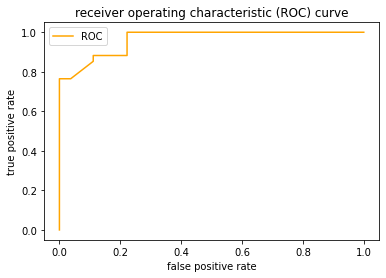

In [120]:
#buat fungsi untuk plot ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    #plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #customize the plot
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [119]:
#import
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9640522875816994

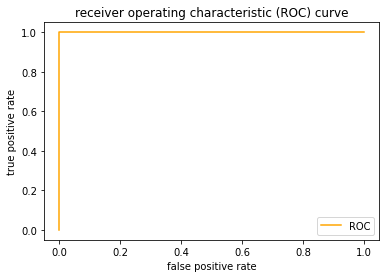

In [121]:
#plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [122]:
#perfect AUC score
roc_auc_score(y_test,y_test)

1.0

### confusion matrix

In [124]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[21,  6],
       [ 1, 33]], dtype=int64)

### visualisasi confusion matrix dengan pd.crosstab

In [126]:
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual'],
           colnames=["Predict"])

Predict,0,1
Actual,,
0,21,6
1,1,33


In [127]:
21 + 6 + 1 + 33

61

In [128]:
#cek jumlah data yang diprediksi
len(y_preds)

61

<AxesSubplot:>

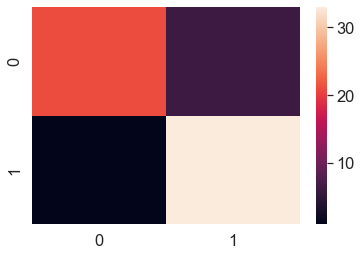

In [132]:
#visualisasi confusion matrix menggunakan seaborn's heatmap
import seaborn as sns

#set ukuran huruf
sns.set(font_scale=1.5)

#buat confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot menggunakan seaborn
sns.heatmap(conf_mat)

### kalo error "dont have modul" harus diimport diterminal dulu

In [131]:
#menggunakan code sbb

#======================>opsi 1<=============================
# cd C:\Users\ProfSlurk\Desktop\project_belajar
# conda activate cd C:\Users\ProfSlurk\Desktop\project_belajar\env
# conda install seaborn

#======================>opsi 2<=============================
#import sys
#!conda install --yes --prefix (sys.prefix) seaborn

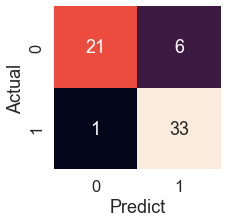

In [141]:
#seaborn dikombin dengan matplot
def plot_conf_mat(conf_mat):
    """
    plot a confusion matrix using seaborn heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, #anotasi kotaknya dgn conf_mat info
                     cbar=False)
    plt.xlabel("Predict")
    plt.ylabel("Actual");
    
plot_conf_mat(conf_mat)

C:\Users\ProfSlurk\Desktop\project_belajar\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


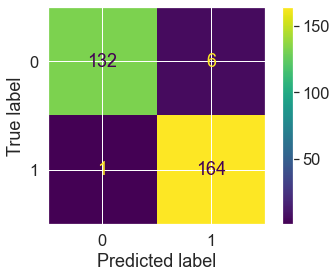

In [140]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,x,y)

### clasification report

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       0.85      0.97      0.90        34

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



### Note
1. precision = perbandingan antara TP dengan jumlah data yang diprediksi positif.
2. recall = perbandingan antara TP dengan jumlah data yang sebenarnya positif (actual)

* precision dan recall pasti salah satu di antara mereka nilainya akan lebih besar yang disebabkan FP dan FN

In [144]:
#where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #hanya positif (1)

disease_preds = np.zeros(10000) #hanya model yang memprediksi 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\ProfSlurk\Desktop\project_belajar\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ProfSlurk\Desktop\project_belajar\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ProfSlurk\Desktop\project_belajar\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 evaluasi matrix model regressi

1. R^2 atau koefisien atau determinasi
2. mean absolute error (MAE)
3. mean square error (MSE)

In [148]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#buat data
x = boston_df.drop("target",axis=1)
y = boston_df["target"]
#split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#fit model
model = RandomForestRegressor()
model.fit(x_train,y_train)
#buat prediksi
model.score(x_test,y_test)

0.8654448653350507

In [150]:
from sklearn.metrics import r2_score

#isi array denan rata2 y_test
y_test_mean=np.full(len(y_test),y_test.mean())
#display
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [151]:
y_test.mean()

21.488235294117654

In [152]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [153]:
r2_score(y_test,y_test)

1.0

**mean absolute error (MAE)**

In [154]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [158]:
df = pd.DataFrame(data={"actual": y_test,
                        "predict": y_preds})
df["differences"] = df["predict"] - df["actual"]
df

,actual,predict,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**mean square error (MSE)**

In [160]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [163]:
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### 4.2.3 Finally using the scoring parameter

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [167]:
np.random.seed(42)

#Pake cross validation
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [174]:
#print akurasi cross validation
print(f"Akurasi cross validation: {np.mean(cv_acc)*100:.2f}%")

Akurasi cross validation: 82.48%


In [172]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [175]:
#print akurasi
print(f"Akurasi cross validation: {np.mean(cv_acc)*100:.2f}%")

Akurasi cross validation: 82.48%


In [179]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision
np.mean(cv_precision)

0.8329547346025924

In [180]:
#print precision
print(f"Precision: {np.mean(cv_precision)}")

Precision: 0.8329547346025924


In [181]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall
np.mean(cv_recall)

0.8545454545454545

In [182]:
#print recall
print(f"Recall: {np.mean(cv_recall)}")

Recall: 0.8545454545454545


### bagaimana jika modelnya regresi?

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [185]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.5533477845702309

In [187]:
#print r2
print(f"R2: {np.mean(cv_r2)}")

R2: 0.5533477845702309


In [188]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.823518960260124

In [190]:
#print mse
print(f"MSE: {np.mean(cv_mse)}")

MSE: -21.823518960260124


In [191]:
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.030763541059988

In [192]:
#print MAE
print(f"MAE: {np.mean(cv_mae)}")

MAE: -3.030763541059988


## 4.3 Using different evaluation metrics as Scikit-Learn functions

**classification evaluation function**

In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**regression evaluation function**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

## 5. Improving a model 

### 5.1 Tuning hyperparameters by hand

In [196]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [197]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [208]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 91.11%
Precision: 0.92
Recall: 0.92
F1 score: 0.92


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [199]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [200]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [201]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [202]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [203]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [204]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [205]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [206]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


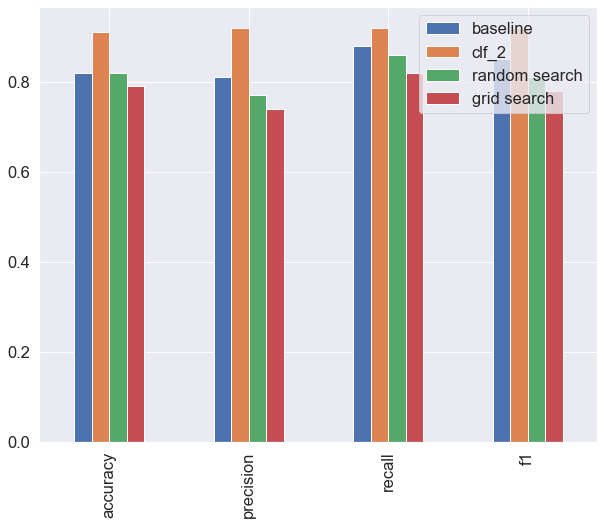

In [209]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# 6. Saving and loading trained machine learning models

### pickle

In [211]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [212]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [213]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### joblib

In [214]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [215]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [216]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# 7. Putting it all together!

In [223]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [224]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [225]:
gs_model.score(X_test, y_test)

0.3339554263158365